[[0.004 0.01  0.02  0.028 0.032 0.028 0.02  0.01  0.004]
 [0.01  0.03  0.057 0.081 0.091 0.081 0.057 0.03  0.01 ]
 [0.02  0.057 0.108 0.154 0.173 0.154 0.108 0.057 0.02 ]
 [0.028 0.081 0.154 0.22  0.246 0.22  0.154 0.081 0.028]
 [0.032 0.091 0.173 0.246 0.276 0.246 0.173 0.091 0.032]
 [0.028 0.081 0.154 0.22  0.246 0.22  0.154 0.081 0.028]
 [0.02  0.057 0.108 0.154 0.173 0.154 0.108 0.057 0.02 ]
 [0.01  0.03  0.057 0.081 0.091 0.081 0.057 0.03  0.01 ]
 [0.004 0.01  0.02  0.028 0.032 0.028 0.02  0.01  0.004]]
[[0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.002 0.044 0.002 0.    0.    0.   ]
 [0.    0.    0.    0.044 0.996 0.044 0.    0.    0.   ]
 [0.    0.    0.    0.002 0.044 0.002 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.  

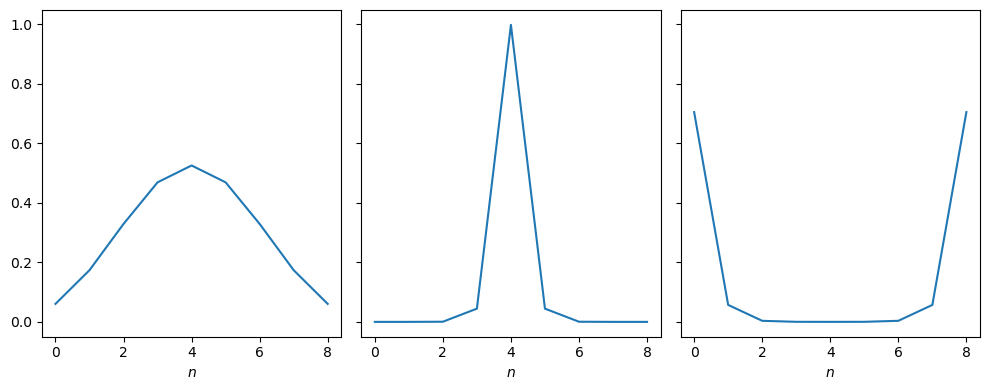

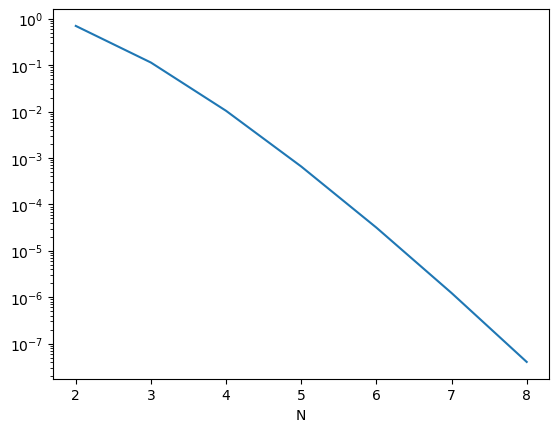

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def eigen(N, U, J):
    diag = [U/2*(n*(n-1) + (N-n)*(N-n-1)) for n in range(N+1)]
    off = [-J*(np.sqrt((n+1)*(N-n))) for n in range(N)]
    H = np.diag(diag) + np.diag(off, 1) + np.diag(off, -1)

    value, vector = np.linalg.eigh(H)
    return value, vector

N = 8
values1, vectors1 = eigen(N, 1, 100)
values2, vectors2 = eigen(N, 100, 1)
values3, vectors3 = eigen(N, -5, 1)

gs1 = vectors1[:,0]
gs2 = vectors2[:,0]
gs3 = vectors3[:,0]
gss = [gs1, gs2, gs3]
NN = list(range(N+1))

fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)
ax[0].plot(NN,np.abs(gs1))
ax[0].set_xlabel(r'$n$')
ax[1].plot(NN,np.abs(gs2))
ax[1].set_xlabel(r'$n$')
ax[2].plot(NN,np.abs(gs3))
ax[2].set_xlabel(r'$n$')

plt.tight_layout()
fig.savefig('wf.pdf', bbox_inches='tight')

# density matrix
rho1 = np.matmul(np.transpose(np.array([gs1])),np.array([gs1])) 
rho2 = np.matmul(np.transpose(np.array([gs2])),np.array([gs2])) 
rho3 = np.matmul(np.transpose(np.array([gs3])),np.array([gs3])) 
np.set_printoptions(precision=3, suppress= True)
print(rho1)
print(rho2)
print(rho3)
print(np.array([gs1]))
print(np.transpose(np.array([gs1])))
# relative particle fluctions
deltaN = []
for i in range(3):
    gs = gss[i]
    dN = 0
    for n in range(N+1):
        dN += np.power(N-n-n,2) * np.power(gs[n],2)
    deltaN.append(dN)
print(deltaN)

# excitation gap
gaps = []
for n in range(N-1):
    values, vectors = eigen(n+2, -5, 1)
    gap = values[1] - values[0]
    gaps.append(gap)

Nn = list(range(2,N+1))
fig2 = plt.figure()
plt.plot(Nn, gaps)
plt.yscale('log')
plt.xlabel(r'N')

plt.savefig("gap.pdf")